<a href="https://colab.research.google.com/github/Sana0131-bit/COSC482_DataScience_WebScraping/blob/main/Assignment%206.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [6]:
df = pd.read_csv("cleaned_ebay_deals.csv", dtype=str)
df.head()

,timestamp,title,price,original_price,shipping,url,discount_percentage
0,2025-03-19 06:28:22,"Klipsch R-120SWi 12"" High-Performance Wireless...",159.99,179.99,Free shipping,https://www.ebay.com/itm/365374754988?_trkparm...,11.11
1,2025-03-19 06:28:22,Apple iPhone 14 Pro Max 128GB Network Unlocked...,499.99,1099.0,Free shipping,https://www.ebay.com/itm/365374754988?_trkparm...,54.51
2,2025-03-19 06:28:22,Apple iPhone 14 Pro Max 256GB Unlocked Very Go...,549.99,1199.0,Free shipping,https://www.ebay.com/itm/365374754988?_trkparm...,54.13
3,2025-03-19 06:28:22,Apple iPhone 14 Pro A2650 128GB Network Unlock...,414.99,899.0,Free shipping,https://www.ebay.com/itm/365374754988?_trkparm...,53.84
4,2025-03-19 06:28:22,Apple iPhone 14 128GB Network Unlocked Very Go...,305.99,749.0,Free shipping,https://www.ebay.com/itm/365374754988?_trkparm...,59.15


In [7]:
def clean_currency(prices):
    """Clean currency values by removing non-numeric characters."""
    def convert_value(x):
        if pd.isna(x):
            return x
        if isinstance(x, str):
            cleaned = re.sub(r'[^\d.-]', '', x.strip())
            if cleaned == '':
                return None
            return cleaned
        return x
    return prices.apply(convert_value)

# Apply cleaning to price columns
df['price'] = clean_currency(df['price'])
df['original_price'] = clean_currency(df['original_price'])

# Fill NA in original_price with price values
df['original_price'] = df['original_price'].fillna(df['price'])

# Show cleaned prices
df[['price', 'original_price']].head()


,price,original_price
0,159.99,179.99
1,499.99,1099.0
2,549.99,1199.0
3,414.99,899.0
4,305.99,749.0


In [8]:
# Set Pandas option to avoid future downcasting warnings
pd.set_option('future.no_silent_downcasting', True)

# Clean shipping column
df["shipping"] = df["shipping"].replace(["N/A", ""], "Shipping info unavailable")
df["shipping"] = df["shipping"].replace(r'^\s*$', 'Shipping info unavailable', regex=True)
df["shipping"] = df["shipping"].fillna("Shipping info unavailable")

# Show shipping info
df["shipping"].value_counts()

,count
shipping,
Shipping info unavailable,1892
Free shipping,867


In [9]:
# Convert to numeric
df["price"] = pd.to_numeric(df["price"], errors="coerce")
df["original_price"] = pd.to_numeric(df["original_price"], errors="coerce")

# Show numeric prices
df[['price', 'original_price']].head()

,price,original_price
0,159.99,179.99
1,499.99,1099.00
2,549.99,1199.00
3,414.99,899.00
4,305.99,749.00


In [10]:
# Calculate discount percentage
df["discount_percentage"] = ((1 - (df["price"] / df["original_price"])) * 100).round(2)
df["discount_percentage"] = df["discount_percentage"].fillna(0)

# Show discount stats
df["discount_percentage"].describe()

,discount_percentage
count,2759.000000
mean,47.115314
std,20.254379
min,0.000000
25%,36.870000
50%,51.780000
75%,60.020000
max,89.750000


In [11]:
# Drop rows with missing prices
initial_count = len(df)
df = df.dropna(subset=["price", "original_price"])
cleaned_count = len(df)

print(f"Removed {initial_count - cleaned_count} rows with missing prices.")
print(f"Final dataset has {cleaned_count} rows.")

Removed 0 rows with missing prices.
Final dataset has 2759 rows.


In [12]:
# Save cleaned data
df.to_csv("cleaned_ebay_deals.csv", index=False)
print("Data cleaning complete. Cleaned data saved as 'cleaned_ebay_deals.csv'.")

# Show final dataframe info
df.info()

Data cleaning complete. Cleaned data saved as 'cleaned_ebay_deals.csv'.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2759 entries, 0 to 2758
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            2759 non-null   object 
 1   title                2759 non-null   object 
 2   price                2759 non-null   float64
 3   original_price       2759 non-null   float64
 4   shipping             2759 non-null   object 
 5   url                  2759 non-null   object 
 6   discount_percentage  2759 non-null   float64
dtypes: float64(3), object(4)
memory usage: 151.0+ KB


In [16]:
print("Missing values before cleaning:")
print(df.isnull().sum()[df.isnull().sum() > 0])

# Drop rows with missing values in key columns
required_columns = ['price', 'original_price', 'shipping', 'discount_percentage']
df_clean = df.dropna(subset=required_columns)

# Verify cleaning
print("\nMissing values after cleaning:")
print(df_clean.isnull().sum()[df_clean.isnull().sum() > 0])

# Show the impact of cleaning
print(f"\nRows removed: {len(df) - len(df_clean)} ({((len(df) - len(df_clean))/len(df))*100:.2f}%)")

Missing values before cleaning:
Series([], dtype: int64)

Missing values after cleaning:
Series([], dtype: int64)

Rows removed: 0 (0.00%)


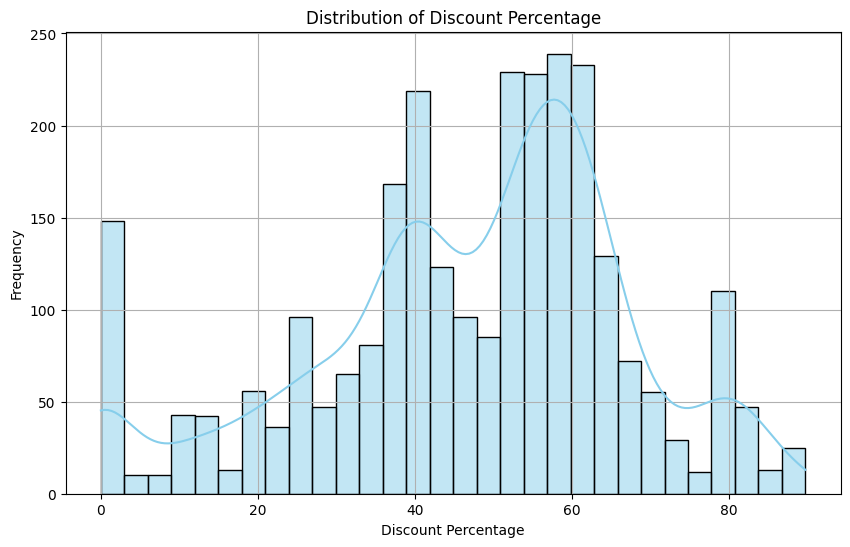

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plot a histogram and density plot of discount_percentage
plt.figure(figsize=(10, 6))
sns.histplot(df['discount_percentage'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Discount Percentage")
plt.xlabel("Discount Percentage")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [20]:
# Part 3: Binning and Balancing
df = df.dropna(subset=["price", "original_price", "shipping", "discount_percentage"])

def bin_discount(val):
    if val <= 10:
        return 'Low'
    elif val <= 30:
        return 'Medium'
    else:
        return 'High'

df['discount_bin'] = df['discount_percentage'].apply(bin_discount)
bin_counts = df['discount_bin'].value_counts()
min_count = bin_counts.min()

balanced_df = df.groupby('discount_bin').apply(lambda x: x.sample(min_count, random_state=42)).reset_index(drop=True)
balanced_df = balanced_df.drop(columns=['discount_bin'])

# Convert shipping column to numeric (0 = Free, 1 = Not Free)
balanced_df['shipping_numeric'] = balanced_df['shipping'].apply(lambda x: 0 if 'Free' in x else 1)

<ipython-input-20-a55cd724d573>:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = df.groupby('discount_bin').apply(lambda x: x.sample(min_count, random_state=42)).reset_index(drop=True)


In [21]:
# Part 4: Regression Modeling
X = balanced_df[['price', 'original_price', 'shipping_numeric']]
y = balanced_df['discount_percentage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("📊 Regression Evaluation Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.3f}")

📊 Regression Evaluation Metrics:
MAE: 10.80
MSE: 224.55
RMSE: 14.98
R² Score: 0.587


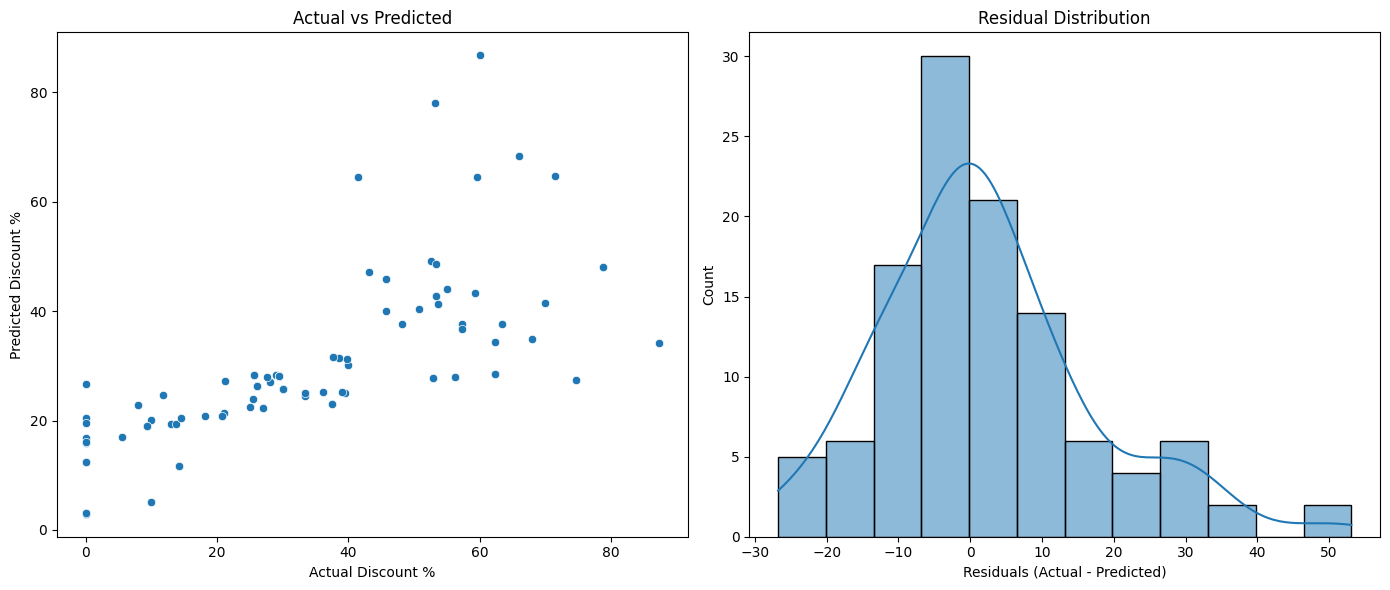

In [22]:
# Part 5: Visual Evaluation
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Discount %")
plt.ylabel("Predicted Discount %")
plt.title("Actual vs Predicted")

plt.subplot(1, 2, 2)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.xlabel("Residuals (Actual - Predicted)")
plt.title("Residual Distribution")

plt.tight_layout()
plt.show()

In [23]:
# Part 6: Apply Model to Incomplete Data
df['shipping_numeric'] = df['shipping'].apply(lambda x: 0 if 'Free' in x else 1)
sample_df = df.drop(columns=['discount_percentage']).sample(20, random_state=42)

sample_features = sample_df[['price', 'original_price', 'shipping_numeric']]
sample_df['Predicted Discount (%)'] = model.predict(sample_features).round(2)

# Display results
display(sample_df[['title', 'price', 'original_price', 'shipping', 'Predicted Discount (%)']])


,title,price,original_price,shipping,Predicted Discount (%)
367,Apple iPhone 14 Pro Max 128GB Network Unlocked...,509.99,1099.00,Shipping info unavailable,41.27
1293,Apple iPhone 14 Pro 256GB Network Unlocked Exc...,494.99,999.00,Shipping info unavailable,37.60
2460,Apple Watch Series 10 GPS + Cellular 42mm Smar...,294.99,499.00,Shipping info unavailable,26.74
2329,"Apple MacBook Pro 13"" Late 2020 M1 1TB SSD 16G...",649.99,649.99,Shipping info unavailable,12.35
521,"Microsoft Surface Laptop 7 Copilot+PC 13.8"" Sn...",724.00,1099.00,Shipping info unavailable,28.44
817,Samsung Galaxy Watch5 Sm-r910 44mm Gps 16GB - ...,60.00,179.00,Shipping info unavailable,26.20
322,Apple iPhone 14 Pro A2650 128GB Network Unlock...,414.99,899.00,Shipping info unavailable,37.83
1628,BenQ TK710 3200-Lumen XPR UHD 4K Gaming Projec...,1533.00,2129.99,Shipping info unavailable,27.04
365,"Seagate EXOS X16 16TB 256MB 7200rpm 3.5"" SATA ...",179.99,219.99,Free shipping,26.72
2510,"Microsoft Surface Laptop 7 Copilot+PC 13.8"" Sn...",784.99,1099.00,Shipping info unavailable,24.78
